In [51]:
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

boston = pd.read_csv("BostonHousing.csv")
# print(boston_dataset.keys())

In [52]:
#load boston dataset into pandas dataframe
# boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [53]:
# boston['MEDV'] = boston_dataset.target

<AxesSubplot:>

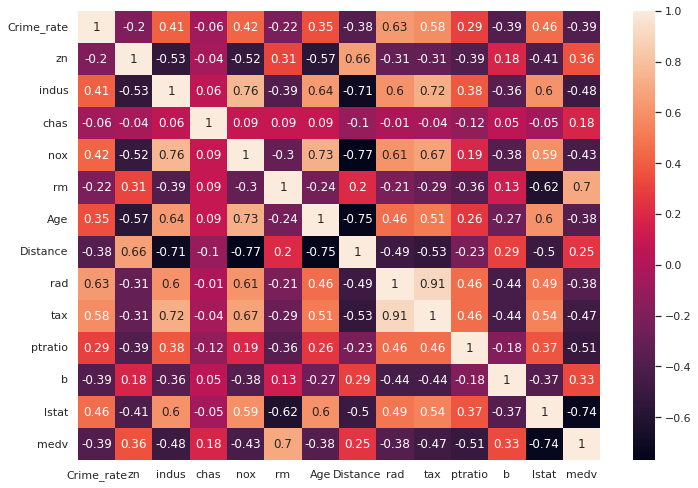

In [54]:

correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

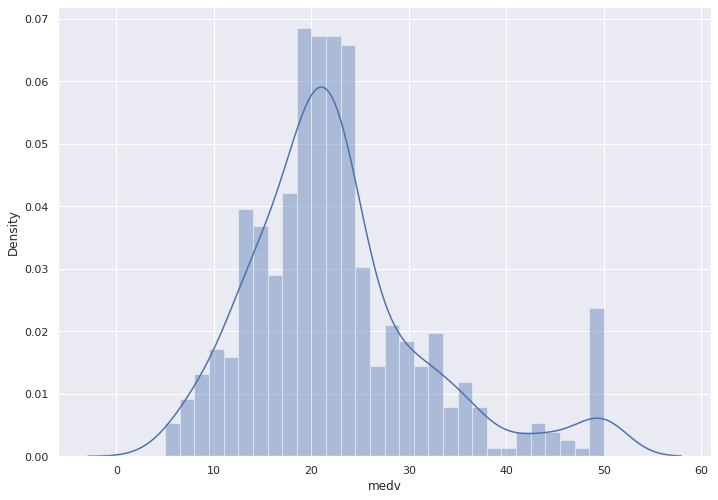

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['medv'], bins=30)


CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

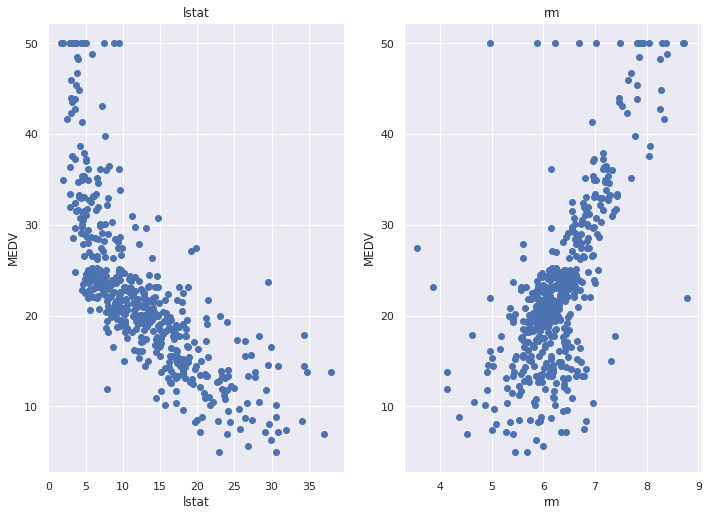

In [56]:
# plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [71]:
# Assuming 'boston_dataset' contains your data, and you want to predict the 'MEDV' column

X = boston.drop('medv', axis=1)  # Features
Y = boston['medv']               # Target


In [86]:
import numpy as np
from sklearn.model_selection import train_test_split

# Remove null, infinite, and NaN values from both X and Y
X_clean = X[~np.isnan(X).any(axis=1) & ~np.isinf(X).any(axis=1)]
Y_clean = Y[X_clean.index]

# Split the cleaned data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=5)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [85]:
# X_train.isnull().sum()
# np.isfinite(X.all())

# np.any(np.isnan(X))
# np.all(np.isfinite(X))
# X.head()
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform it to fill missing values
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y.reshape(-1, 1))

AttributeError: 'Series' object has no attribute 'reshape'

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))